In [3]:
import pandas as pd        #Изучение метрики r2 на градиентном бустнге, так же
import numpy as np         #изучение тонкостей кросс-валидации с помощью статистического анализа
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.datasets import load_boston
from scipy.stats import ttest_rel

X, y = load_boston(return_X_y=True)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
score=cross_val_score(estimator=GradientBoostingRegressor(n_estimators=250, random_state=241, learning_rate=0.2),
                X=X, y=y,
                cv=5, scoring='r2')

In [4]:
score #большой разброс из-за метрики r2

array([0.7799348 , 0.79681537, 0.73018481, 0.55871139, 0.41887288])

In [5]:
scores = np.array([])
for i in range(10):
    fold = KFold(n_splits=5, shuffle=True, random_state=i)
    scores_on_this_split = cross_val_score(
            estimator=GradientBoostingRegressor(n_estimators=250, random_state=241, learning_rate=0.2),
            X=X, y=y,
            cv=fold, scoring='r2')
    scores = np.append(scores, scores_on_this_split)
scores

array([0.82590011, 0.92976627, 0.80812382, 0.83730574, 0.93583897,
       0.90839145, 0.81842459, 0.91601758, 0.82893207, 0.90281831,
       0.89609427, 0.91914155, 0.90071309, 0.82391955, 0.9101657 ,
       0.92721173, 0.79699767, 0.91897091, 0.73588716, 0.86077252,
       0.87589488, 0.89671602, 0.88083   , 0.88095984, 0.87675422,
       0.88768647, 0.91905804, 0.9104647 , 0.8967642 , 0.85737609,
       0.87540883, 0.9092444 , 0.90097911, 0.82444218, 0.895729  ,
       0.83295612, 0.90999611, 0.87377773, 0.91776035, 0.92658613,
       0.74309003, 0.91006938, 0.92696344, 0.8758435 , 0.76156283,
       0.8984037 , 0.89720529, 0.87698397, 0.84078217, 0.88633708])

In [8]:
scores_200_trees = np.array([])
scores_50_trees = np.array([])
for i in range(10):
    fold = KFold(n_splits=5, shuffle=True, random_state=i)
    scores_200_trees_on_this_split = cross_val_score(
                                            estimator=GradientBoostingRegressor(n_estimators=200,  random_state=1),
                                            X=X, y=y,
                                            cv=fold, scoring='r2')
    scores_200_trees = np.append(scores_200_trees,
                                 scores_200_trees_on_this_split)
    scores_50_trees_on_this_split = cross_val_score(# надо попробовать сравнить с catboost
                                            estimator=GradientBoostingRegressor(n_estimators=50, random_state=1),
                                            X=X, y=y,
                                            cv=fold, scoring='r2')
    scores_50_trees = np.append(scores_50_trees,
                                 scores_50_trees_on_this_split)

In [9]:
ttest_rel(scores_200_trees, scores_50_trees) #200 деревьев лучше, pvalue <0.005 and stat. большой

Ttest_relResult(statistic=7.1874999102942505, pvalue=3.4003572884713576e-09)

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'t-statistic')

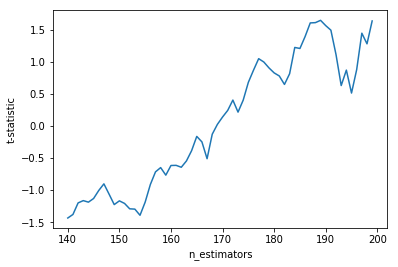

In [11]:
%pylab inline
t_stats = []
n_trees = []
for j in range(140, 200):
    current_score = np.array([])
    for i in range(10):
        fold = KFold(n_splits=5, shuffle=True, random_state=i)
        scores_on_this_split = cross_val_score(
                                      estimator=GradientBoostingRegressor(n_estimators= j,  random_state=1),
                                      X=X, y=y,
                                      cv=fold, scoring='r2')
        current_score = np.append(current_score,
                                  scores_on_this_split)
    t_stat, p_value = ttest_rel(current_score, scores_200_trees)
    t_stats.append(t_stat)
    n_trees.append(j)
plt.plot(n_trees, t_stats)# все хуже
plt.xlabel('n_estimators')#чем больше деревьев тем чувствительнее к выбросам
plt.ylabel('t-statistic')

In [18]:
from sklearn.metrics import r2_score
r2_score(
    [1,   2,    3,   4,   5,   11],#чем больше расстояние между объектамми то 
    [1.1, 1.96, 3.1, 4.5, 4.8, 5.3]#тем больше будет прирост качества на единицу приближения
)

0.49992210526315806

In [74]:
from sklearn.model_selection import cross_val_predict

base_estimator = GradientBoostingRegressor(n_estimators= 200,  random_state=1)
pred_train = cross_val_predict(estimator=base_estimator, X=X, y=y, cv=5)
abs_train_error = np.absolute(y.T.values - pred_train)
outlier_mask = (abs_train_error > 10)                  #если примем что ошибка больше 10 выброс то
                                                    #3.4 процента будт выбросами
print 'Outliers fraction in train = ',\
float(y[outlier_mask.T].shape[0]) / y.values.shape[0]

Outliers fraction in train =  0.0335968379447


In [ ]:
#если примем что ошибка больше 10 выброс то
#3.4 процента будт выбросами